In [49]:
import numpy as np
import matplotlib.pyplot as plt

### Creating population of 1,00,000 points uniformly distributed between 0.01 and 1000

In [50]:
# creating data consisting of 100000 points uniformly distribtuied between 0.01 and 1000
data = np.zeros(100000)     
for i in range(100000):
    data[i] = 0.01 * (i + 1)

print(data)

[1.0000e-02 2.0000e-02 3.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]


#### Mean and true variance
Mean:


$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$

True Variance:


$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2$

In [51]:
# mean
data_sum = np.sum(data)
data_mean = data_sum / 100000

print("mean:", data_mean)

# true variance
data_variance = np.sum((data - data_mean)**2) / 100000

print("true variance:", data_variance)

mean: 500.005
true variance: 83333.33332500001


#### Computing s1_squared, s2_squared and s3_squared for a sample of 50 points with replacement

s1_squared:

$s1^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

s2_squared:

$s2^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

s3_squared:

$s3^2 = \frac{n}{n-1} s2^2$

In [52]:
def compute_sample_variance(sample):
    sample_mean = np.sum(sample) / 50

    s1_sqd = sum((xi - sample_mean) ** 2 for xi in sample) / (51)
    s2_sqd = sum((xi - sample_mean) ** 2 for xi in sample) / 50
    s3_sqd = sum((xi - sample_mean) ** 2 for xi in sample) / (49)

    return s1_sqd, s2_sqd, s3_sqd


Average_s1_squared:

$\frac{1}{m} \sum_{i=1}^{m} s1^2$

Average_s2_squared:

$\frac{1}{m} \sum_{i=1}^{m} s2^2$

Average_s3_squared:

$\frac{1}{m} \sum_{i=1}^{m} s3^2$

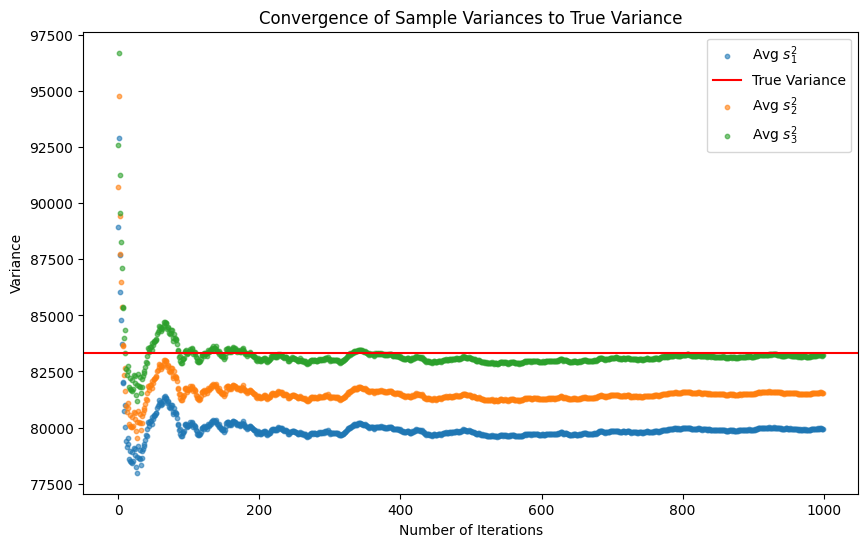

In [53]:
s1 = []
s2 = []
s3 = []

avg_s1 = []
avg_s2 = []
avg_s3 = []

itr = 1000

for _ in range(itr):
    sample = np.random.choice(data, 50, replace=True)
    s1_sqd, s2_sqd, s3_sqd = compute_sample_variance(sample)
    s1.append(s1_sqd)
    s2.append(s2_sqd)
    s3.append(s3_sqd)

    avg_s1.append(np.mean(s1))
    avg_s2.append(np.mean(s2))
    avg_s3.append(np.mean(s3))


# print("s1:", s1)
# print("s2:", s2)
# print("s3:", s3)

# print("avg_s1:", avg_s1)
# print("avg_s2:", avg_s2)
# print("avg_s3:", avg_s3)

plt.figure(figsize=(10, 6))

plt.scatter(range(itr), avg_s1, label = r'Avg $s_1^2$', s=10, alpha=0.6)
plt.axhline(y=data_variance, color='r', linestyle='-', label = 'True Variance')

plt.scatter(range(itr), avg_s2, label = r'Avg $s_2^2$', s=10, alpha=0.6)
# plt.axhline(y=data_variance, color='r', linestyle='-', label = 'True Variance')

plt.scatter(range(itr), avg_s3, label = r'Avg $s_3^2$', s=10, alpha=0.6)
# plt.axhline(y=data_variance, color='r', linestyle='-', label = 'True Variance')

plt.title('Convergence of Sample Variances to True Variance')
plt.xlabel('Number of Iterations')
plt.ylabel('Variance')
plt.legend()

plt.show()

### Inferences
We notice that r'Avg $s_3^2$' reaches the true variance more quickly and frequently compared to the rest. This is because:
- the formula for $s_1^2$ uses n + 1 in the denominator, which tends to underestimate the variance. This makes $s_1^2$ a biased estimator that is slightly biased downwards.
- the formula for $s_2^2$ uses n in the denominator, which also results in a biased estimator but less than $s_1^2$.
- the formula for $s_3^2$ uses n - 1 in the denominator, which is the unbiased sample variance estimator. This formula compensates for the fact that the sample mean (used in calculating the variance) is based on the same data, thus giving a better approximation of the population variance.

$s_3^2$ is called an unbiased estimator because it is corrected for small sample sizes by dividing by n - 1. In statistics, dividing by n - 1 is known as Bessel's correction, which accounts for the fact that the sample mean is less variable than the true population mean. This correction results in a more accurate estimate of the population variance when sampling randomly. Therefore, it tends to converge to the true variance more quickly and frequently compared to the other two estimators.

As more samples are taken, the law of large numbers ensures that all three sample variances will eventually converge to the true variance. However, for small sample sizes, $s_3^2$ is preferred due to its unbiased nature and better approximation of the population variance.

### References
- https://en.wikipedia.org/wiki/Bessel%27s_correction
- https://en.wikipedia.org/wiki/Variance#Sample_variance